In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def periodic(t, phi):
    return np.sin((np.pi / 12.0) * t - phi)

def SR(t, T3lagb, B0=1166, A0=581, phi=-3.71):
    return (B0 + A0 * f_circ(T3lagb) * periodic(t, phi)) * np.exp(-T3lagb)

def SR2(t, T3lagb, B0=1166/100, A0=5.81, phi=-3.71, Ksr=2.0, n=2.0):
    return (B0 + A0 * 1 * periodic(t, phi)) * (Ksr**n / (Ksr**n + T3lagb**n))

def SR_noosc(t, T3lagb, B0=1166, A0=581, phi=-3.71):
    return (B0 ) * np.exp(-T3lagb)

def SR2_noosc(t, T3lagb, B0=1166/100, A0=5.81, phi=-3.71, Ksr=2.0, n=2.0):
    return (B0) * (Ksr**n / (Ksr**n + T3lagb**n))

def f_circ(T3lagb, A0=581, Amax=2.37):
    C1 = (Amax / A0) * np.exp(T3lagb) - 1
    C2 = 1 / (1 + np.exp(10 * T3lagb - 55))
    return 1 + C1 * C2

def circadian_amplitude(A0=581):
    return A0 * f_circ(T3lagb, A0=A0)

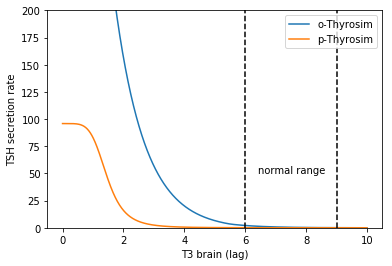

In [26]:
T3lagb = np.arange(0, 10, 0.01)
t = 0
x = SR(t, T3lagb)
x2 = SR2(t, T3lagb, B0=133.5, A0=69.89, phi=-3.71, Ksr=1.4497, n=5.0)


plt.plot(T3lagb, x, label='o-Thyrosim')
plt.plot(T3lagb, x2, label='p-Thyrosim')

plt.xlabel('T3 brain (lag)')
plt.ylabel('TSH secretion rate')
plt.axvline(6, linestyle='--', color='k')
plt.axvline(9, linestyle='--', color='k')
plt.text(6.42, 50, "normal range")
#plt.text(6.4, 400,'normal range')
plt.legend(loc='best')
plt.ylim(0, 200)
plt.savefig("TSH_secretion.png")
plt.show()

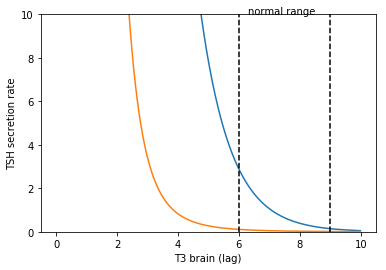

In [15]:
T3lagb = np.arange(0, 10, 0.01)
t = 0
x = SR_noosc(t, T3lagb)
#x2 = SR2(t, T3lagb, Ksr=2.0, n=2.0)
x3 = SR2_noosc(t, T3lagb, B0=133.5, A0=69.89, phi=-3.71, Ksr=1.4497, n=5.0)

plt.plot(T3lagb, x)
#plt.plot(T3lagb, x2)
plt.plot(T3lagb, x3)

plt.xlabel('T3 brain (lag)')
plt.ylabel('TSH secretion rate')
plt.axvline(6, linestyle='--', color='k')
plt.axvline(9, linestyle='--', color='k')
plt.text(6.3, 10,'normal range')
plt.ylim(0, 10)
plt.show()

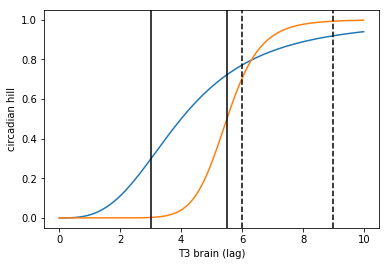

In [5]:
def circadian_hill(x, Km, n):
    return x**n / (x**n + Km**n)

T3lagb = np.arange(0, 10, 0.01)
t = 0


#plt.plot(T3lagb, circadian_hill(T3lagb, Km=2.5, n=4))
plt.plot(T3lagb, circadian_hill(T3lagb, Km=4, n=3))
plt.plot(T3lagb, circadian_hill(T3lagb, Km=5.5, n=10))

#plt.plot(T3lagb, x2)
#plt.plot(T3lagb, x3)

plt.xlabel('T3 brain (lag)')
plt.ylabel('circadian hill')

plt.axvline(3, linestyle='-', color='k')
plt.axvline(5.5, linestyle='-', color='k')


plt.axvline(6, linestyle='--', color='k')
plt.axvline(9, linestyle='--', color='k')
#plt.text(6.3, 10,'normal range')
#plt.ylim(0, 20)
plt.show()

In [6]:
circadian_hill(6.9, Km=2.5, n=4)

0.9830588384484763

Plot of the circadian amplitude of TSH secretion (SR) changing between $A_{\max} = 2.31$ and $A_0 = 581$ before multiplying by the exponential.

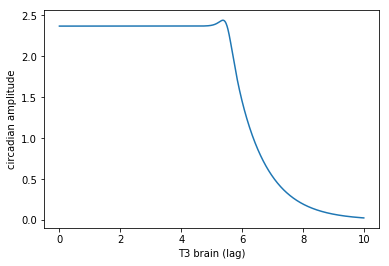

In [7]:
T3lagb = np.arange(0, 10, 0.01)

plt.plot(T3lagb, np.exp(-T3lagb) * circadian_amplitude(A0=581))
plt.xlabel('T3 brain (lag)')
plt.ylabel('circadian amplitude')
plt.show()

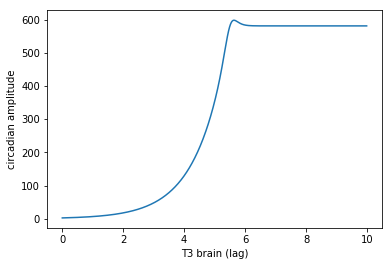

In [8]:
T3lagb = np.arange(0, 10, 0.01)

plt.plot(T3lagb, circadian_amplitude(A0=581))
plt.xlabel('T3 brain (lag)')
plt.ylabel('circadian amplitude')
plt.show()

In [9]:
np.exp(-7)

0.0009118819655545162

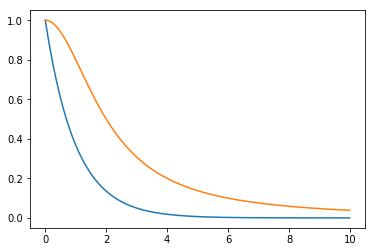

In [10]:
import numpy as np
from matplotlib import pyplot as plt

Ksr = 2
n = 2
plt.plot(T3lagb, np.exp(-T3lagb))
plt.plot(T3lagb, (Ksr**n / (Ksr**n + T3lagb**n)))

plt.show()

## Blood volume plots

In [11]:
def blood_volume(height, weight, sex):
    a = 30.19
    b = -0.01744
    c = 39.47
    d = 0.0006516
    
    if sex == 'male':
        ideal_weight = 176.3 - 2.206 * (height * 100.0) + 0.00935 * (height * 100.0) ** 2
    else:
        ideal_weight = 145.8 - 1.827 * (height * 100.0) + 0.007955 * (height * 100.0) ** 2
        
    
    dev = 100.0 * (weight - ideal_weight) / ideal_weight
    Vb_per_kg = a * np.exp(b * dev) + c * np.exp(d * dev)
    
    return Vb_per_kg * weight / 1000.0
    

In [12]:
3.2 * (blood_volume(1.658, 119, 'female') / blood_volume(1.63, 59, 'female'))

4.41678107610875

In [18]:
0.6 * blood_volume(1.63, 59, 'female')

2.4766374389605343

### Fixing $f_4$ (turns T4 in blood to T3 in brain)

In [35]:
def f4(T3b, k3=0.118):
    return k3 + 5.0 * k3 / (1.0 + np.exp(2.0 * T3b - 7.0))

def f4_hill(T3b, k3=0.118, Kmf4=3.5, nf4=8):
    return k3 * (1.0 + 5.0 * (Kmf4**nf4 / (Kmf4**nf4 + T3b**nf4)))

In [36]:
T3b = np.arange(0, 10, 0.01)

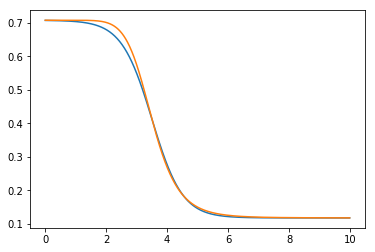

In [37]:
plt.plot(T3b, f4(T3b))
plt.plot(T3b, f4_hill(T3b))

plt.show()